In [1]:
from qutip import baths,fit_utils
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt

In [2]:
s=1
alpha=0.05
wc=5
T=1

def spectral_density(w):

        return (alpha * w ** (s)
                / (wc ** (1 - s))
                * np.e ** (-abs(w) / wc))

def correlation_function(t):
    if T != 0:
        corr = (
            (1 / np.pi)
            * alpha
            * wc ** (1 - s)
            * (1/T) ** (-(s + 1))
            * mp.gamma(s + 1)
        )
        z1_u = (1 + (1/T) * wc - 1.0j *
                wc * t) / ((1/T) * wc)
        z2_u = (1 + 1.0j * wc * t) / ((1/T) * wc)
        return np.array(
            [
                complex(
                    corr * (mp.zeta(s + 1, u1) +
                            mp.zeta(s + 1, u2)))
                for u1, u2 in zip(z1_u, z2_u)],
            dtype=np.complex128,)
    else:
        corr = (1 / np.pi)*alpha*wc**(s+1) * \
            mp.gamma(s+1)*(1+1j*wc*t)**(-(s+1))
        return np.array(corr, dtype=np.complex128)


In [3]:
t=np.linspace(0,30,1000)
corr = correlation_function(t)

In [4]:
bb3=baths.BosonicReservoir.from_CF(T=1,C=corr,t=t)

In [5]:
t2=np.linspace(0,20,500)
corr=correlation_function(t2)


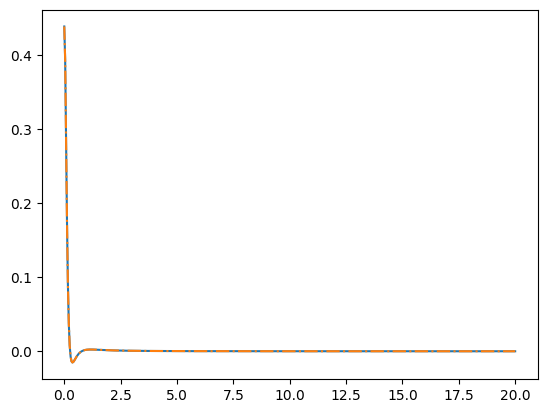

In [6]:
plt.plot(t2,np.real(corr))
plt.plot(t2,np.real(bb3.correlation_function(t2)),"-.")
plt.show()

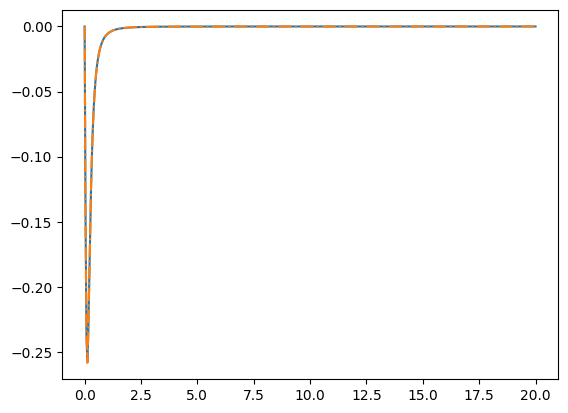

In [7]:
plt.plot(t2,np.imag(corr))
plt.plot(t2,np.imag(bb3.correlation_function(t2)),"-.")
plt.show()

In [8]:
w=np.linspace(0,150,1500)

In [11]:
sp=bb3.spectral_density(w)

150.0


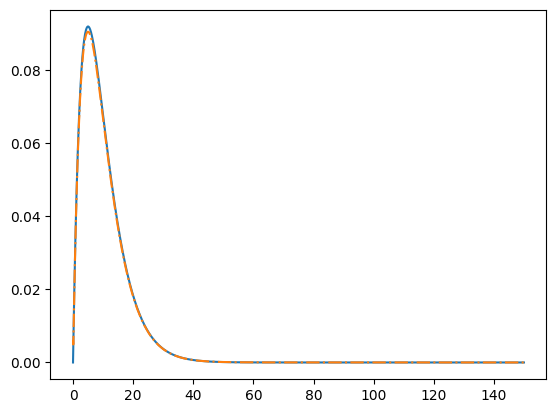

In [12]:
plt.plot(w,spectral_density(w))
plt.plot(w,sp,"-.")
plt.show()